# Data Clustering
Tools used in Data Clustering of the workflows/orders

In [1]:
# SUPPRESS WARNING

import warnings
from numba.core.errors import NumbaDeprecationWarning

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=NumbaDeprecationWarning)

### Import data

In [2]:
from src.data.data_parser import WorkflowsImport, OrdersImport

# IMPORT DATA
WORKFLOWS = WorkflowsImport.IMPORT_FROM_CSV("2024")
ORDERS = OrdersImport.IMPORT_FROM_CSV()

### Provide clustering configuration

In [24]:
from src.clustering.clustering_evaluation import ClusteringMetrics
from src.clustering.clustering_pre_processing import ClusteringPreProcessing
from src.helpers.dimensionality_reducer import DimensionalityReducer
from src.clustering.clustering_methods import ClusteringMethod
from src.clustering.clustering import ClusteringObjective
from src.helpers.feature_encoder import WORKFLOW_FEATURES, ORDER_FEATURES


# DEFINE TYPE OF OBJECTS THAT ARE GOING TO BE CLUSTERED
CLUSTERING_OBJECTIVE = ClusteringObjective.WORKFLOWS

# DEFINE FEATURES DISPLAYED IN ANALYSIS
WORKFLOWS_DISPLAYABLE_DETAILS = [
    WORKFLOW_FEATURES.CPU, 
    WORKFLOW_FEATURES.MEMORY, 
    WORKFLOW_FEATURES.EPHEMERAL_STORAGE, 
    WORKFLOW_FEATURES.STORAGE, 
    WORKFLOW_FEATURES.PROCESSED_SIZE,
    WORKFLOW_FEATURES.DURATION,
    WORKFLOW_FEATURES.STEPS_NO, 
    WORKFLOW_FEATURES.PRIORITY
]

ORDERS_DISPLAYABLE_DETAILS = [
    ORDER_FEATURES.CPU, 
    ORDER_FEATURES.MEMORY, 
    ORDER_FEATURES.EPHEMERAL_STORAGE, 
    ORDER_FEATURES.STORAGE, 
    ORDER_FEATURES.PROCESSED_SIZE,
    ORDER_FEATURES.DURATION,
    ORDER_FEATURES.WORKFLOW_NO,
    ORDER_FEATURES.ORDER_STATUS_CODE,
    ORDER_FEATURES.ORDER_NAME_CODE
]

# DEFINE CLUSTERING PARAMETERS
CLUSTERING_METHOD = ClusteringMethod.K_MEANS
CLUSTERING_PARAMS = [8]

# SPECIFY PRE-PROCESSING OPERATIONS
REDUCTION_PARAMS = ()
DIMENSIONALITY_REDUCTION = DimensionalityReducer.PCA
PRE_PROCESSING_OPERATIONS = [
    ClusteringPreProcessing.ONLY_DB_RECORDS, 
    ClusteringPreProcessing.MERGE_STATUSES,
    ClusteringPreProcessing.FILTER_TEST_WORKFLOWS,
    ClusteringPreProcessing.MERGE_TYPES,
    ClusteringPreProcessing.FILTER_OUT_DOWNLOAD_WORKFLOWS
]

# DEFINE FEATURES USED IN CLUSTERING
WORKFLOWS_CLUSTERING_DETAILS = [
    WORKFLOW_FEATURES.DURATION,
    WORKFLOW_FEATURES.MEMORY,
    WORKFLOW_FEATURES.EPHEMERAL_STORAGE,
    WORKFLOW_FEATURES.STORAGE,
    WORKFLOW_FEATURES.PROCESSED_SIZE,
    WORKFLOW_FEATURES.EXECUTED_STEPS_NO,
    WORKFLOW_FEATURES.ARGO_STATUS_CODE,
    WORKFLOW_FEATURES.ARGO_OUTPUT_MSG_CODE,
    WORKFLOW_FEATURES.PROCESSOR_TYPE_CODE
]

ORDER_CLUSTERING_DETAILS = [
    ORDER_FEATURES.DURATION,
    ORDER_FEATURES.MEMORY,
    ORDER_FEATURES.WORKFLOW_NO,
    ORDER_FEATURES.EPHEMERAL_STORAGE,
    ORDER_FEATURES.STORAGE,
    ORDER_FEATURES.PROCESSED_SIZE,
    ORDER_FEATURES.ORDER_STATUS_CODE
]

# DEFINE EVALUATION METRICS
VALIDATION_METRICS = [ClusteringMetrics.SILHOUETTE, ClusteringMetrics.CALINSKI, ClusteringMetrics.DAVIES]

# SPECIFY IF CLUSTERING TEST SHOULD BE RUN
TEST_PARAMETERS = False

# SPECIFY IF RESULTS SHOULD BE SAVED
SAVE_RESULTS = True

# SPECIFY NAME OF THE FILE UNDER WHICH THE RESULTS ARE TO BE STORED
CLUSTERING_NAME = f'K-Means without download 2024'

CLUSTERING_DETAILS = WORKFLOWS_CLUSTERING_DETAILS if CLUSTERING_OBJECTIVE == ClusteringObjective.WORKFLOWS else ORDER_CLUSTERING_DETAILS
DISPLAYABLE_DETAILS = WORKFLOWS_DISPLAYABLE_DETAILS if CLUSTERING_OBJECTIVE == ClusteringObjective.WORKFLOWS else ORDERS_DISPLAYABLE_DETAILS
CLUSTERING_DATA = WORKFLOWS if CLUSTERING_OBJECTIVE == ClusteringObjective.WORKFLOWS else ORDERS 

### Run data clustering

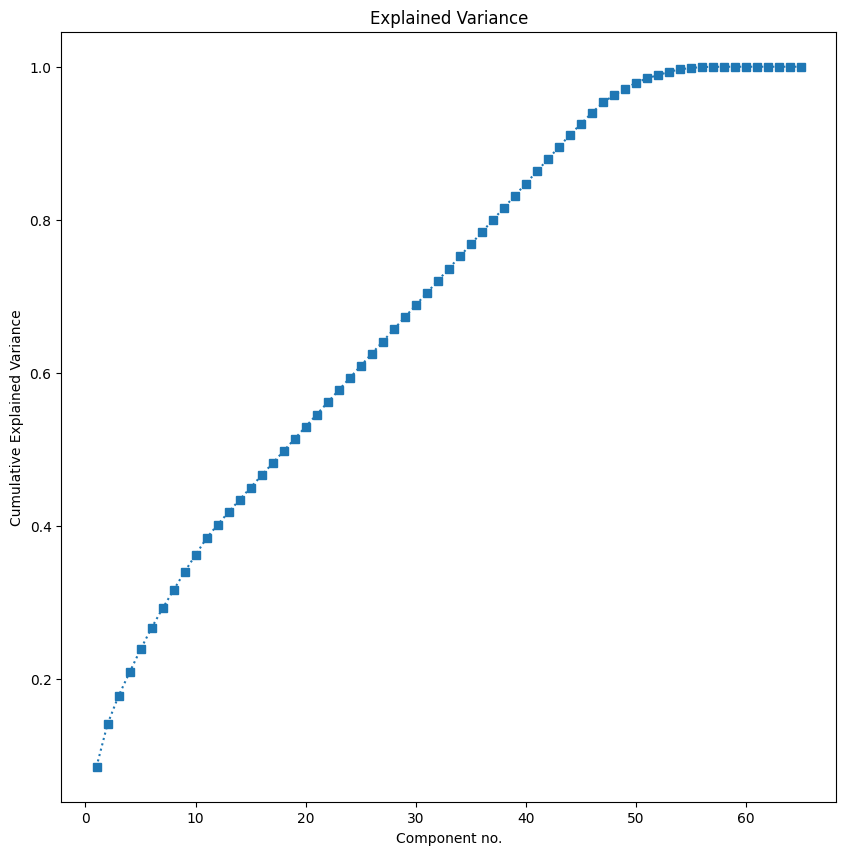

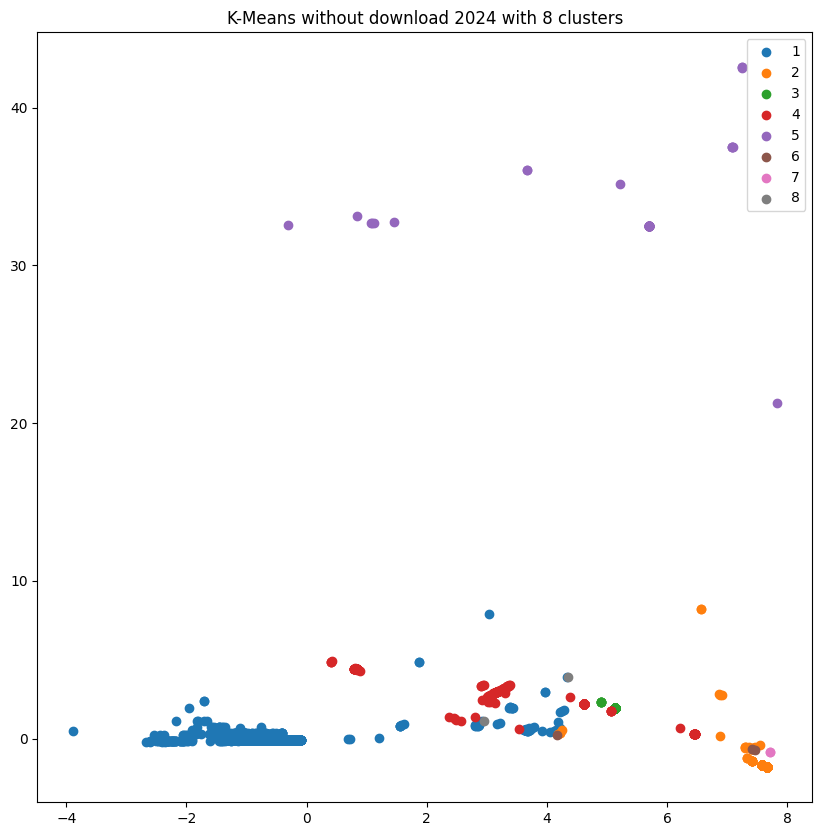

Unnamed: 0                                   uid  \
0               0  001b619d-ebfa-4e5b-a143-54ec10aa1c4a   
1               1  00206b0a-cb47-43a7-836d-099569495c3c   
2               2  003240d3-6ce0-49d4-9d4b-aea3a35ba782   
3               3  003ae82d-b990-4142-9b0a-12e60a1f34b9   
4               4  003f6d52-59de-48a0-9bf6-046cc2a6bd62   
...           ...                                   ...   
22620       22620  fff84746-3470-4ed0-aff0-43864925673a   
22621       22621  fff87a61-418c-480d-908e-64f174d63069   
22622       22622  fffc6e44-376f-4ab0-81ba-a1fbd13811cd   
22623       22623  fffc9390-71ba-4d23-89e6-ce12a86e9c7e   
22624       22624  fffe6f54-f210-4cb3-b78a-34cc91ee1e11   

                           order_name  order_id  status      order_status  \
0      order-2024-04-09T13:35:15.012Z   2294066  failed  done_with_errors   
1      order-2024-04-03T15:16:03.304Z   2290430  failed  done_with_errors   
2      order-2024-04-17T11:29:43.271Z   2300181  failed  done_with_errors   
3      order-2024-04-19T12:36:48.293Z   2301683  failed  done_with_errors   
4      order-2024-04-03T15:47:03.668Z   2290475    done  done_with_errors   
...                               ...       ...     ...               ...   
22620             Pipeline_processing   2307188    done              done   
22621             Pipeline_processing   2312482    done              done   
22622             Pipeline_processing   2316812    done              done   
22623             Pipeline_processing   2315225    done              done   
22624             Pipeline_processing   2310441    done              done   

      argo_status argo_detailed_status             argo_output_message  \
0       Succeeded            undefined        not enough base products   
1       Succeeded            undefined        not enough base products   
2       Succeeded            undefined        not enough base products   
3       Succeeded            undefined        not enough base products   
4       Succeeded            undefined               already processed   
...           ...                  ...                             ...   
22620   Succeeded            undefined  product processed successfully   
22621   Succeeded            undefined  product processed successfully   
22622   Succeeded            undefined  product processed successfully   
22623   Succeeded            undefined  product processed successfully   
22624   Succeeded            undefined  product processed successfully   

          processor_name  ...  \
0                    coh  ...   
1                    coh  ...   
2      card_coh12_public  ...   
3                    coh  ...   
4                card_bs  ...   
...                  ...  ...   
22620            grd_cog  ...   
22621            grd_cog  ...   
22622            grd_cog  ...   
22623            grd_cog  ...   
22624            grd_cog  ...   

       processor_name_code_dlr-Sentinel-1-L0-S6_GRDH_1S  \
0                                                   0.0   
1                                                   0.0   
2                                                   0.0   
3                                                   0.0   
4                                                   0.0   
...                                                 ...   
22620                                               0.0   
22621                                               0.0   
22622                                               0.0   
22623                                               0.0   
22624                                               0.0   

       processor_name_code_dlr-Sentinel-1-L0-S6_OCN__2S  \
0                                                   0.0   
1                                                   0.0   
2                                                   0.0   
3                                                   0.0   
4                                                   0.0   
...                     


Cluster no. 8
Silhouette Score: 0.8879725228493399
Calinski-Harabasz Score: 1142.7295391693956
Davies-Bouldin Score: 0.9676889878226672


Cluster 1 (size: 19511):


cpu   memory ephemeral_storage storage processed_size   duration  \
mean       756    17188               163       1      963745777        429   
std       4919    16490                60      11      334739354       4971   
min         38      858                 0       0              0         83   
max     413407  1389688               801     256     8036566998     413483   
cov   6.506614  0.95939          0.368098    11.0       0.347332  11.587413   

     initial_steps_no  priority  
mean                4       997  
std                 0        54  
min                 4         1  
max                 5      1000  
cov               0.0  0.054162


Count per status:


count
status           
done        19502
processing      5
failed          3
cancelled       1


Count per order status:


count
order_status           
done              19503
processing            5
done_with_errors      3


Count per argo status:


count
argo_status       
Succeeded    19511


Count per argo output message:


count
argo_output_message                  
product processed successfully  19508
product not found                   3


Count per processor name:


count
processor_name                     
grd_cog                       19453
acri-Sentinel-3-L0-OL_1_EFR       8
c2rcc                             6
acri-Sentinel-2-L0-S2MSI2A        3
acri-Sentinel-3-L0-SY_2_VG1       3
dlr-Sentinel-1-L0-S1_GRDH_1S      2
dlr-Sentinel-1-L0-S6_OCN__2S      2
dlr-Sentinel-1-L0-S6_GRDH_1S      2
dlr-Sentinel-1-L0-S5_OCN__2S      2
dlr-Sentinel-1-L0-S5_GRDH_1S      2
dlr-Sentinel-1-L0-S4_OCN__2S      2
dlr-Sentinel-1-L0-S4_GRDH_1S      2
dlr-Sentinel-1-L0-S2_OCN__2S      2
dlr-Sentinel-1-L0-S2_GRDH_1S      2
lai                               2
acri-Sentinel-3-L0-SR_2_LAN       2
acri-Sentinel-3-L0-SR_1_SRA       2
acri-Sentinel-3-L0-SL_2_FRP       2
acri-Sentinel-3-L0-SL_1_RBT       2
acri-Sentinel-3-L0-OL_2_LFR       2
acri-Sentinel-3-L0-OL_1_ERR       2
acri-Sentinel-3-L0-SY_2_SYN       1
acri-Sentinel-3-L0-SY_2_AOD       1
dlr-Sentinel-1-L0-S3_GRDH_1S      1
dlr-Sentinel-1-L0-S3_OCN__2S      1
acri-Sentinel-3-L0-OL_2_LRR       1
dlr-Sentinel-1-L0-IW_SLC__1S      1


Count per processor name and status and argo output message and argo detailed status:


count
processor_name               status     argo_output_message            argo_detailed_status       
grd_cog                      done       product processed successfully undefined             19445
acri-Sentinel-3-L0-OL_1_EFR  done       product processed successfully undefined                 8
c2rcc                        done       product processed successfully undefined                 6
grd_cog                      processing product processed successfully undefined                 5
acri-Sentinel-2-L0-S2MSI2A   done       product processed successfully undefined                 3
grd_cog                      failed     product not found              undefined                 3
dlr-Sentinel-1-L0-S6_OCN__2S done       product processed successfully undefined                 2
dlr-Sentinel-1-L0-S6_GRDH_1S done       product processed successfully undefined                 2
dlr-Sentinel-1-L0-S5_OCN__2S done       product processed successfully undefined                 2
dlr-Sentinel-1-L0-S5_GRDH_1S done       product processed successfully undefined                 2
dlr-Sentinel-1-L0-S4_OCN__2S done       product processed successfully undefined                 2
dlr-Sentinel-1-L0-S4_GRDH_1S done       product processed successfully undefined                 2
dlr-Sentinel-1-L0-S2_OCN__2S done       product processed successfully undefined                 2
dlr-Sentinel-1-L0-S2_GRDH_1S done       product processed successfully undefined                 2
dlr-Sentinel-1-L0-S1_GRDH_1S done       product processed successfully undefined                 2
acri-Sentinel-3-L0-SY_2_VG1  done       product processed successfully undefined                 2
acri-Sentinel-3-L0-SR_2_LAN  done       product processed successfully undefined                 2
acri-Sentinel-3-L0-SR_1_SRA  done       product processed successfully undefined                 2
acri-Sentinel-3-L0-SL_2_FRP  done       product processed successfully undefined                 2
acri-Sentinel-3-L0-SL_1_RBT  done       product processed successfully undefined                 2
acri-Sentinel-3-L0-OL_2_LFR  done       product processed successfully undefined                 2
acri-Sentinel-3-L0-OL_1_ERR  done       product processed successfully undefined                 2
lai                          done       product processed successfully undefined                 2
dlr-Sentinel-1-L0-IW_SLC__1S done       product processed successfully undefined                 1
acri-Sentinel-3-L0-SY_2_VG1  cancelled  product processed successfully undefined                 1
dlr-Sentinel-1-L0-S3_GRDH_1S done       product processed successfully undefined                 1
dlr-Sentinel-1-L0-S3_OCN__2S done       product processed successfully undefined                 1
acri-Sentinel-3-L0-SY_2_SYN  done       product processed successfully undefined                 1
acri-Sentinel-3-L0-SY_2_AOD  done       product processed successfully undefined                 1
acri-Sentinel-3-L0-OL_2_LRR  done       product processed successfully undefined                 1


Count per processor name and status:


count
processor_name               status           
grd_cog                      done        19445
acri-Sentinel-3-L0-OL_1_EFR  done            8
c2rcc                        done            6
grd_cog                      processing      5
acri-Sentinel-2-L0-S2MSI2A   done            3
grd_cog                      failed          3
dlr-Sentinel-1-L0-S6_OCN__2S done            2
dlr-Sentinel-1-L0-S6_GRDH_1S done            2
dlr-Sentinel-1-L0-S5_OCN__2S done            2
dlr-Sentinel-1-L0-S5_GRDH_1S done            2
dlr-Sentinel-1-L0-S4_OCN__2S done            2
dlr-Sentinel-1-L0-S4_GRDH_1S done            2
dlr-Sentinel-1-L0-S2_OCN__2S done            2
dlr-Sentinel-1-L0-S2_GRDH_1S done            2
dlr-Sentinel-1-L0-S1_GRDH_1S done            2
acri-Sentinel-3-L0-SY_2_VG1  done            2
acri-Sentinel-3-L0-SR_2_LAN  done            2
acri-Sentinel-3-L0-SR_1_SRA  done            2
acri-Sentinel-3-L0-SL_2_FRP  done            2
acri-Sentinel-3-L0-SL_1_RBT  done            2
acri-Sentinel-3-L0-OL_2_LFR  done            2
acri-Sentinel-3-L0-OL_1_ERR  done            2
lai                          done            2
dlr-Sentinel-1-L0-IW_SLC__1S done            1
acri-Sentinel-3-L0-SY_2_VG1  cancelled       1
dlr-Sentinel-1-L0-S3_GRDH_1S done            1
dlr-Sentinel-1-L0-S3_OCN__2S done            1
acri-Sentinel-3-L0-SY_2_SYN  done            1
acri-Sentinel-3-L0-SY_2_AOD  done            1
acri-Sentinel-3-L0-OL_2_LRR  done            1



Cluster 2 (size: 1472):


cpu     memory ephemeral_storage   storage processed_size  \
mean        447        197                 0       201         836598   
std        7757       2486                 0         7       22444387   
min           1         20                 0       160              0   
max      170503      54580                 0       256      833955840   
cov   17.353468  12.619289               0.0  0.034826      26.828162   

       duration initial_steps_no priority  
mean        473                2        1  
std        7759                0        0  
min          20                2        1  
max      170561                5        1  
cov   16.403805              0.0      0.0


Count per status:


count
status       
failed   1467
done        5


Count per order status:


count
order_status           
done_with_errors   1467
done                  5


Count per argo status:


count
argo_status       
Succeeded     1472


Count per argo output message:


count
argo_output_message                       
not enough base products              1447
lta acri-st input product not found      6
ipf error                                5
product processed successfully           5
request is queued for processing         5
lta acri-st error                        2
lta copernicus error                     2


Count per processor name:


count
processor_name                     
coh                             742
card_coh12_public               705
acri-Sentinel-2-L0-S2MSI1C       15
acri-Sentinel-2-L0-S2MSI2A        3
dlr-Sentinel-1-L0-IW_SLC__1S      2
acri-Sentinel-3-L0-OL_2_LRR       1
acri-Sentinel-3-L0-SL_2_FRP       1
dlr-Sentinel-1-L0-S3_GRDH_1S      1
dlr-Sentinel-1-L0-S3_OCN__2S      1
dlr-Sentinel-1-L0-S3_SLC__1S      1


Count per processor name and status and argo output message and argo detailed status:


count
processor_name               status argo_output_message                 argo_detailed_status       
coh                          failed not enough base products            undefined               742
card_coh12_public            failed not enough base products            undefined               705
acri-Sentinel-2-L0-S2MSI1C   done   product processed successfully      undefined                 5
                             failed ipf error                           undefined                 4
                                    lta acri-st input product not found undefined                 4
acri-Sentinel-2-L0-S2MSI2A   failed lta acri-st input product not found undefined                 2
dlr-Sentinel-1-L0-IW_SLC__1S failed request is queued for processing    undefined                 2
acri-Sentinel-2-L0-S2MSI1C   failed lta acri-st error                   undefined                 1
                                    lta copernicus error                undefined                 1
acri-Sentinel-2-L0-S2MSI2A   failed ipf error                           undefined                 1
acri-Sentinel-3-L0-OL_2_LRR  failed lta acri-st error                   undefined                 1
acri-Sentinel-3-L0-SL_2_FRP  failed lta copernicus error                undefined                 1
dlr-Sentinel-1-L0-S3_GRDH_1S failed request is queued for processing    undefined                 1
dlr-Sentinel-1-L0-S3_OCN__2S failed request is queued for processing    undefined                 1
dlr-Sentinel-1-L0-S3_SLC__1S failed request is queued for processing    undefined                 1


Count per processor name and status:


count
processor_name               status       
coh                          failed    742
card_coh12_public            failed    705
acri-Sentinel-2-L0-S2MSI1C   failed     10
                             done        5
acri-Sentinel-2-L0-S2MSI2A   failed      3
dlr-Sentinel-1-L0-IW_SLC__1S failed      2
acri-Sentinel-3-L0-OL_2_LRR  failed      1
acri-Sentinel-3-L0-SL_2_FRP  failed      1
dlr-Sentinel-1-L0-S3_GRDH_1S failed      1
dlr-Sentinel-1-L0-S3_OCN__2S failed      1
dlr-Sentinel-1-L0-S3_SLC__1S failed      1



Cluster 3 (size: 480):


cpu    memory ephemeral_storage storage processed_size  duration  \
mean    6       126                 0      80              0        85   
std     3        54                 0       0              0        21   
min     4        80                 0      80              0        51   
max    40       817                 0      80              0       210   
cov   0.5  0.428571               0.0     0.0            0.0  0.247059   

     initial_steps_no priority  
mean                4        1  
std                 0        0  
min                 4        1  
max                 4        1  
cov               0.0      0.0


Count per status:


count
status       
failed    480


Count per order status:


count
order_status           
done_with_errors    480


Count per argo status:


count
argo_status       
Succeeded      480


Count per argo output message:


count
argo_output_message                
no copdems found for product    480


Count per processor name:


count
processor_name       
card_bs           480


Count per processor name and status and argo output message and argo detailed status:


count
processor_name status argo_output_message          argo_detailed_status       
card_bs        failed no copdems found for product undefined               480


Count per processor name and status:


count
processor_name status       
card_bs        failed    480



Cluster 4 (size: 291):


cpu    memory ephemeral_storage   storage processed_size  duration  \
mean    16455   1645308                 0       116     7804980255      4018   
std     31653   3163327                 0        54     5674079693     21829   
min         2        40                 0        80      571633155        30   
max    171816  11100810                 0       256    13961999430    171750   
cov   1.92361  1.922635               0.0  0.465517       0.726982  5.432802   

     initial_steps_no priority  
mean                7        1  
std                 4        0  
min                 3        0  
max                11        1  
cov          0.571429      0.0


Count per status:


count
status          
done         289
cancelled      2


Count per order status:


count
order_status           
done                165
done_with_errors    126


Count per argo status:


count
argo_status       
Succeeded      291


Count per argo output message:


count
argo_output_message                  
already processed                 147
product processed successfully    144


Count per processor name:


count
processor_name                      
card_bs                          200
card_coh12_public                 78
dlr-Sentinel-1-L0-S1_SLC__1S       2
dlr-Sentinel-1-L0-S2_SLC__1S       2
dlr-Sentinel-1-L0-S4_SLC__1S       2
dlr-Sentinel-1-L0-S5_SLC__1S       2
dlr-Sentinel-1-L0-S6_SLC__1S       2
acri-Sentinel-3-L0-SR_1_SRA_A      1
coh                                1
dlr-Sentinel-1-L0-S3_SLC__1S       1


Count per processor name and status and argo output message and argo detailed status:


count
processor_name                status    argo_output_message            argo_detailed_status       
card_bs                       done      already processed              undefined               127
                                        product processed successfully undefined                73
card_coh12_public             done      product processed successfully undefined                57
                                        already processed              undefined                20
dlr-Sentinel-1-L0-S1_SLC__1S  done      product processed successfully undefined                 2
dlr-Sentinel-1-L0-S2_SLC__1S  done      product processed successfully undefined                 2
dlr-Sentinel-1-L0-S4_SLC__1S  done      product processed successfully undefined                 2
dlr-Sentinel-1-L0-S5_SLC__1S  done      product processed successfully undefined                 2
dlr-Sentinel-1-L0-S6_SLC__1S  done      product processed successfully undefined                 2
acri-Sentinel-3-L0-SR_1_SRA_A done      product processed successfully undefined                 1
card_coh12_public             cancelled product processed successfully undefined                 1
coh                           cancelled product processed successfully undefined                 1
dlr-Sentinel-1-L0-S3_SLC__1S  done      product processed successfully undefined                 1


Count per processor name and status:


count
processor_name                status          
card_bs                       done         200
card_coh12_public             done          77
dlr-Sentinel-1-L0-S1_SLC__1S  done           2
dlr-Sentinel-1-L0-S2_SLC__1S  done           2
dlr-Sentinel-1-L0-S4_SLC__1S  done           2
dlr-Sentinel-1-L0-S5_SLC__1S  done           2
dlr-Sentinel-1-L0-S6_SLC__1S  done           2
acri-Sentinel-3-L0-SR_1_SRA_A done           1
card_coh12_public             cancelled      1
coh                           cancelled      1
dlr-Sentinel-1-L0-S3_SLC__1S  done           1



Cluster 5 (size: 60):


cpu    memory ephemeral_storage  storage processed_size  duration  \
mean       411      6667                23       83              0      4767   
std        664     10158                84       44              0       770   
min          6         1                 0        0              0      2128   
max       2772     55411               534      256              0      7205   
cov   1.615572  1.523624          3.652174  0.53012            0.0  0.161527   

     initial_steps_no  priority  
mean                4       101  
std                 1       302  
min                 2         0  
max                 9      1000  
cov              0.25  2.990099


Count per status:


count
status          
failed        59
cancelled      1


Count per order status:


count
order_status           
done_with_errors     59
done                  1


Count per argo status:


count
argo_status       
Failed          60


Count per argo output message:


count
argo_output_message                
undefined error                  57
critical workflow error           2
stopped with strategy "stop"      1


Count per processor name:


count
processor_name                     
card_bs                          45
grd_cog                           6
dlr-Sentinel-1-L0-IW_SLC__1S      4
dlr-Sentinel-1-L0-IW_GRDH_1S      3
acri-Sentinel-3-L0-OL_2_LFR       1
lai                               1


Count per processor name and status and argo output message and argo detailed status:


count
processor_name               status    argo_output_message          argo_detailed_status               
card_bs                      failed    undefined error              undefined                        43
grd_cog                      failed    undefined error              undefined                         6
dlr-Sentinel-1-L0-IW_SLC__1S failed    undefined error              undefined                         4
dlr-Sentinel-1-L0-IW_GRDH_1S failed    undefined error              undefined                         3
card_bs                      failed    critical workflow error      undefined                         2
acri-Sentinel-3-L0-OL_2_LFR  cancelled stopped with strategy "stop" stopped with strategy "stop"      1
lai                          failed    undefined error              undefined                         1


Count per processor name and status:


count
processor_name               status          
card_bs                      failed        45
grd_cog                      failed         6
dlr-Sentinel-1-L0-IW_SLC__1S failed         4
dlr-Sentinel-1-L0-IW_GRDH_1S failed         3
acri-Sentinel-3-L0-OL_2_LFR  cancelled      1
lai                          failed         1



Cluster 6 (size: 3):


cpu   memory ephemeral_storage storage processed_size  duration  \
mean     1424      541                 0     256       17650128      1489   
std      1927      732                 0       0       30570918      1967   
min       311      118                 0     256              0       353   
max      3649     1386                 0     256       52950383      3761   
cov   1.35323  1.35305               0.0     0.0       1.732051  1.321021   

     initial_steps_no priority  
mean                4        1  
std                 1        0  
min                 3        1  
max                 5        1  
cov              0.25      0.0


Count per status:


count
status       
failed      2
done        1


Count per order status:


count
order_status           
done_with_errors      2
done                  1


Count per argo status:


count
argo_status       
Succeeded        3


Count per argo output message:


count
argo_output_message                  
lta acri-st error                   1
product processed successfully      1
production order invalid            1


Count per processor name:


count
processor_name                    
acri-Sentinel-3-L0-SL_2_LST      3


Count per processor name and status and argo output message and argo detailed status:


count
processor_name              status argo_output_message            argo_detailed_status       
acri-Sentinel-3-L0-SL_2_LST done   product processed successfully undefined                 1
                            failed lta acri-st error              undefined                 1
                                   production order invalid       undefined                 1


Count per processor name and status:


count
processor_name              status       
acri-Sentinel-3-L0-SL_2_LST failed      2
                            done        1



Cluster 7 (size: 2):


cpu   memory ephemeral_storage storage processed_size  duration  \
mean      1062      368                 0     256              0      1106   
std       1061      326                 0       0              0      1064   
min        312      138                 0     256              0       353   
max       1813      599                 0     256              0      1858   
cov   0.999058  0.88587               0.0     0.0            0.0  0.962025   

     initial_steps_no priority  
mean                3        1  
std                 0        0  
min                 3        1  
max                 3        1  
cov               0.0      0.0


Count per status:


count
status       
failed      2


Count per order status:


count
order_status           
done_with_errors      2


Count per argo status:


count
argo_status       
Succeeded        2


Count per argo output message:


count
argo_output_message            
production order invalid      2


Count per processor name:


count
processor_name                   
acri-Sentinel-2-L1-S2MSI2A      2


Count per processor name and status and argo output message and argo detailed status:


count
processor_name             status argo_output_message      argo_detailed_status       
acri-Sentinel-2-L1-S2MSI2A failed production order invalid undefined                 2


Count per processor name and status:


count
processor_name             status       
acri-Sentinel-2-L1-S2MSI2A failed      2



Cluster 8 (size: 2):


cpu    memory ephemeral_storage storage processed_size  duration  \
mean    210009     67408                 0     160       16473555    210082   
std     290132     92892                 0       0              0    290121   
min       4855      1723                 0     160       16473555      4935   
max     415163    133092                 0     160       16473555    415228   
cov   1.381522  1.378056               0.0     0.0            0.0  1.380989   

     initial_steps_no priority  
mean                5        1  
std                 0        0  
min                 5        1  
max                 5        1  
cov               0.0      0.0


Count per status:


count
status       
done        2


Count per order status:


count
order_status       
done              2


Count per argo status:


count
argo_status       
Succeeded        2


Count per argo output message:


count
argo_output_message                  
product processed successfully      2


Count per processor name:


count
processor_name                     
dlr-Sentinel-1-L0-S1_OCN__2S      2


Count per processor name and status and argo output message and argo detailed status:


count
processor_name               status argo_output_message            argo_detailed_status       
dlr-Sentinel-1-L0-S1_OCN__2S done   product processed successfully undefined                 2


Count per processor name and status:


count
processor_name               status       
dlr-Sentinel-1-L0-S1_OCN__2S done        2

Unnamed: 0                                   uid  \
0               0  001b619d-ebfa-4e5b-a143-54ec10aa1c4a   
1               1  00206b0a-cb47-43a7-836d-099569495c3c   
2               2  003240d3-6ce0-49d4-9d4b-aea3a35ba782   
3               3  003ae82d-b990-4142-9b0a-12e60a1f34b9   
4               4  003f6d52-59de-48a0-9bf6-046cc2a6bd62   
...           ...                                   ...   
22620       22620  fff84746-3470-4ed0-aff0-43864925673a   
22621       22621  fff87a61-418c-480d-908e-64f174d63069   
22622       22622  fffc6e44-376f-4ab0-81ba-a1fbd13811cd   
22623       22623  fffc9390-71ba-4d23-89e6-ce12a86e9c7e   
22624       22624  fffe6f54-f210-4cb3-b78a-34cc91ee1e11   

                           order_name  order_id  status      order_status  \
0      order-2024-04-09T13:35:15.012Z   2294066  failed  done_with_errors   
1      order-2024-04-03T15:16:03.304Z   2290430  failed  done_with_errors   
2      order-2024-04-17T11:29:43.271Z   2300181  failed  done_with_errors   
3      order-2024-04-19T12:36:48.293Z   2301683  failed  done_with_errors   
4      order-2024-04-03T15:47:03.668Z   2290475    done  done_with_errors   
...                               ...       ...     ...               ...   
22620             Pipeline_processing   2307188    done              done   
22621             Pipeline_processing   2312482    done              done   
22622             Pipeline_processing   2316812    done              done   
22623             Pipeline_processing   2315225    done              done   
22624             Pipeline_processing   2310441    done              done   

      argo_status argo_detailed_status             argo_output_message  \
0       Succeeded            undefined        not enough base products   
1       Succeeded            undefined        not enough base products   
2       Succeeded            undefined        not enough base products   
3       Succeeded            undefined        not enough base products   
4       Succeeded            undefined               already processed   
...           ...                  ...                             ...   
22620   Succeeded            undefined  product processed successfully   
22621   Succeeded            undefined  product processed successfully   
22622   Succeeded            undefined  product processed successfully   
22623   Succeeded            undefined  product processed successfully   
22624   Succeeded            undefined  product processed successfully   

          processor_name  ...  \
0                    coh  ...   
1                    coh  ...   
2      card_coh12_public  ...   
3                    coh  ...   
4                card_bs  ...   
...                  ...  ...   
22620            grd_cog  ...   
22621            grd_cog  ...   
22622            grd_cog  ...   
22623            grd_cog  ...   
22624            grd_cog  ...   

       processor_name_code_dlr-Sentinel-1-L0-S6_GRDH_1S  \
0                                                   0.0   
1                                                   0.0   
2                                                   0.0   
3                                                   0.0   
4                                                   0.0   
...                                                 ...   
22620                                               0.0   
22621                                               0.0   
22622                                               0.0   
22623                                               0.0   
22624                                               0.0   

       processor_name_code_dlr-Sentinel-1-L0-S6_OCN__2S  \
0                                                   0.0   
1                                                   0.0   
2                                                   0.0   
3                                                   0.0   
4                                                   0.0   
...                     

In [25]:
# CLUSTERING SECTION
from src.clustering.clustering import Clustering

clustering = Clustering(CLUSTERING_NAME, 
                        CLUSTERING_DATA, 
                        CLUSTERING_DETAILS, 
                        DISPLAYABLE_DETAILS, 
                        CLUSTERING_METHOD, 
                        VALIDATION_METRICS, 
                        DIMENSIONALITY_REDUCTION, 
                        CLUSTERING_OBJECTIVE,
                        PRE_PROCESSING_OPERATIONS)
clustering.run(CLUSTERING_PARAMS, REDUCTION_PARAMS, test_params=TEST_PARAMETERS, save_data=SAVE_RESULTS)